In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import os

#Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

## Data Cleaning

In [2]:
os.chdir('D:\Bharati AXA Data')
data = pd.read_csv('insurance_claims.csv')

In [3]:
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [4]:
data.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

Since there are <b>NA</b> values in the dataset, let's drop them and parse date columns as DateTime. Also drop unwanted columns by modifying read_csv 

In [5]:
data = pd.read_csv('insurance_claims.csv', 
                   usecols= ['months_as_customer', 
                             'age', 
                             'policy_bind_date',
                             'policy_state',
                             'policy_csl',
                             'policy_deductable',
                             'policy_annual_premium',
                             'umbrella_limit',
                             'insured_zip',
                             'insured_sex',
                             'insured_education_level',
                             'insured_occupation',
                             'insured_hobbies',
                             'insured_relationship',
                             'capital-gains',
                             'capital-loss',
                             'incident_date',
                             'incident_type',
                             'collision_type',
                             'incident_severity',
                             'authorities_contacted',
                             'incident_state',
                             'incident_city',
                             'incident_hour_of_the_day',
                             'number_of_vehicles_involved',
                             'property_damage',
                             'bodily_injuries',
                             'witnesses',
                             'police_report_available',
                             'total_claim_amount',
                             'injury_claim',
                             'property_claim',
                             'vehicle_claim',
                             'auto_year',
                             'fraud_reported'], 
                   na_values=['?'], na_filter = True, parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [6]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,0,0,NaN,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NaN,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N


## Handling mising values

In [7]:
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [8]:
data.shape

(1000, 35)

Dropping <b>360 columns</b> from a dataset(containing NaN) that contains <b>1000 columns</b> might lead to a considerable loss of data. Since all three columns that contain NaN values are of categorical type, let's <b>replace</b> with it's <b>most occuring value i.e. mode

Replacing <b>NaN</b> in all three columns individually

In [9]:
data['collision_type'].fillna(data['collision_type'].value_counts().index[0], inplace = True)

In [10]:
data['property_damage'].fillna(data['property_damage'].value_counts().index[0], inplace = True)

In [11]:
data['police_report_available'].fillna(data['police_report_available'].value_counts().index[0], inplace = True)

In [12]:
data.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,0,0,NO,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N
5,256,39,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,...,NO,0,2,NO,64100,6410,6410,51280,2003,Y
6,137,34,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,...,NO,0,0,NO,78650,21450,7150,50050,2012,N
7,165,37,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,...,NO,2,2,YES,51590,9380,9380,32830,2015,N
8,27,33,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,...,NO,1,1,YES,27700,2770,2770,22160,2012,N
9,212,42,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,...,NO,2,1,NO,42300,4700,4700,32900,1996,N


In [39]:
data.to_csv('D:\Bharati AXA Data\Data after cleaning.csv', index = False)

<b>Checking whether any column is left with NaN

In [14]:
data.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [15]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

# EDA - Plotting

Let’s see how many have been reported

In [16]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

247 cases of fraud were reported and 753 weren't reported ever

Let's plot <b>fraud reported v/s Gender</b> by <b>binning Age

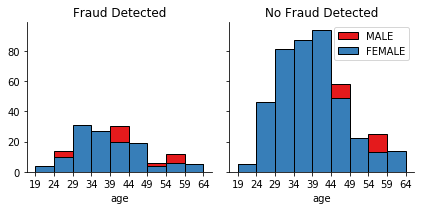

In [17]:
bins = np.linspace(data.age.min(), data.age.max(), 10)
g = sns.FacetGrid(data, col='fraud_reported', hue = 'insured_sex', palette='Set1', col_wrap=2, size = 3)
g.map(plt.hist,'age', bins=bins, ec="k")

g.axes[-1].legend()
g.set(xticks = bins)

#Change Titles
axes = g.axes.flatten()
axes[0].set_title("Fraud Detected")
axes[1].set_title("No Fraud Detected")

plt.show()

(array([1., 0., 0., 0.]),
 array([ 0.  ,  5.75, 11.5 , 17.25, 23.  ]),
 <a list of 4 Patch objects>)

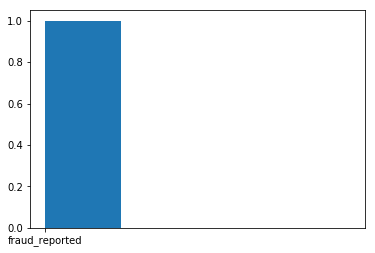

In [18]:
bins1 = np.linspace(data.incident_hour_of_the_day.min(), data.incident_hour_of_the_day.max(), 5)

plt.hist('fraud_reported', bins = bins1)

Let's plot incident numbers state wise

# Feature Selection

In [19]:
data[['policy_state', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']].describe()

,policy_state,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted
count,1000,1000,1000,1000,1000,1000,1000
unique,3,7,14,4,3,4,5
top,OH,JD,machine-op-inspct,Multi-vehicle Collision,Rear Collision,Minor Damage,Police
freq,352,161,93,419,470,354,292


Let's drop first 2 columns since they have very high unique values which will lead to higher number of states. Also, droppingother columns that wouldn't be required for modeling 

In [20]:
data.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim'], axis = 1, inplace = True)

In [21]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,Major Damage,5,1,1,2,YES,71610,2004,Y
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,Minor Damage,8,1,0,0,NO,5070,2007,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,Minor Damage,7,3,2,3,NO,34650,2007,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,Major Damage,5,1,1,2,NO,63400,2014,Y
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,Minor Damage,20,1,0,1,NO,6500,2009,N


In [22]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
collision_type                  object
incident_severity               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
dtype: object

### Let's convert all categorical variable to numerical using ONE HOT ENCODING

In [23]:
data_onehot = data[['policy_state','insured_sex', 'collision_type', 'incident_severity']]

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
enc = OneHotEncoder(sparse = False)

In [26]:
enc.fit(data_onehot)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [27]:
data_onehot_transformed = enc.transform(data_onehot)

In [28]:
data_onehot_transformed

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [29]:
# Converting returned array into a DataFrame

data2 = pd.DataFrame(data_onehot_transformed, 
                     columns = ['OH', 'IN', 'IL', 
                                'Insured_Male', 'Insured_Female',
                                'Side_Collison','Rear _Collison','Front Collison',
                                'Major Damage','Minor Damage','Total Loss','Trivial Damage'])

In [30]:
data2.head()

,OH,IN,IL,Insured_Male,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
data = pd.concat([data, data2], axis = 1)

In [32]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,IL,Insured_Male,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [33]:
data.isna().sum() # to check if we are left with any NaN

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
capital-gains                  0
capital-loss                   0
collision_type                 0
incident_severity              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
auto_year                      0
fraud_reported                 0
OH                             0
IN                             0
IL                             0
Insured_Male                   0
Insured_Female                 0
Side_Collison                  0
Rear _Collison                 0
Front Collison                 0
Major Damage                   0
Minor Damage                   0
Total Loss                     0
Trivial Da